<a href="https://colab.research.google.com/github/AlirezaAhadipour/PyTorch-deep-learning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.2.1+cu121'

### Data

Use a linear regression formula to make a straight line with **known** parameters.

In [2]:
# Params
weight = 0.85
bias = 0.2

X = torch.arange(start=0, end=1, step=0.02).unsqueeze(dim=1)
y = weight * X + bias

In [3]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2170],
         [0.2340],
         [0.2510],
         [0.2680],
         [0.2850],
         [0.3020],
         [0.3190],
         [0.3360],
         [0.3530]]))

### Train/test split

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
def plot_preds(train_data=X_train,
               train_labels=y_train,
               test_data=X_test,
               test_labels=y_test,
               predictions=None):
  plt.figure()
  plt.scatter(train_data, train_labels, color='blue', label='train')
  plt.scatter(test_data, test_labels, color='green', label='test')

  if predictions is not None:
    plt.scatter(test_data, predictions, color='red', label='pred')

  plt.legend()
  plt.xlabel('X')
  plt.ylabel('y')

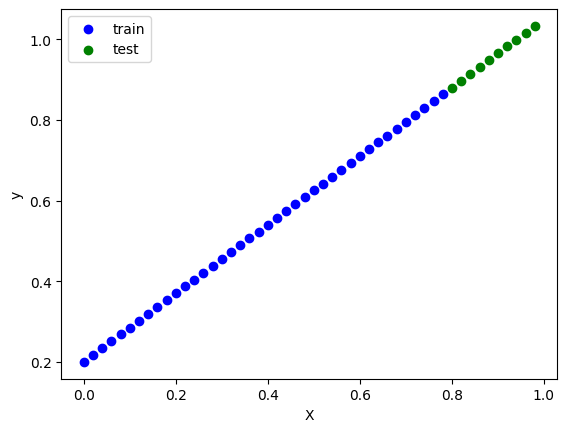

In [6]:
plot_preds()

### Model

In [7]:
## Creat linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x):
    return self.weight * x + self.bias


In [8]:
## create an instance of the model

torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
## Making predictions
# with torch.no_grad():
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

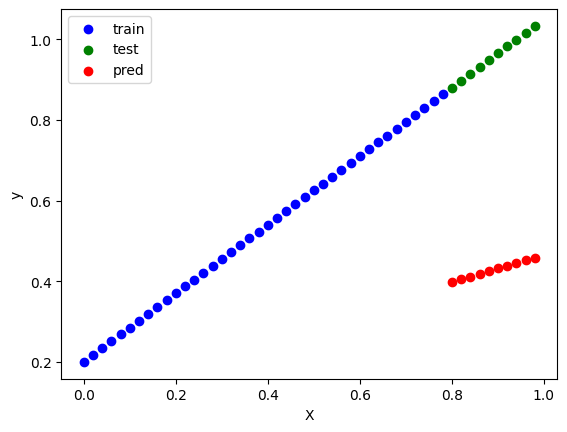

In [11]:
plot_preds(predictions=y_preds)

### Training

In [12]:
# loss function
loss_fn = nn.L1Loss()
loss_fn

L1Loss()

In [13]:
# optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [14]:
## Building a training loop
epochs = 250

# track values
epoch_counts = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  epoch_counts.append(epoch)
  model_0.train()   # set to training mode

  # forward pass
  y_preds = model_0(X_train)

  # loss
  loss = loss_fn(y_preds, y_train)
  loss_values.append(loss)
  # print(f'Loss: {loss}')

  # optimize
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # gradient descent
  optimizer.step()


  ## Testing
  model_0.eval()   # turns off some settings in the testing mode like dropout, batch normalization, ...

  with torch.inference_mode():   # turns off gradient tracking
    # forward pass
    test_pred = model_0(X_test)

    # loss
    test_loss = loss_fn(test_pred, y_test)
    test_loss_values.append(test_loss)


  if epoch % 10 == 0:
    print(f'Epoch: {epoch + 1}, Loss: {loss:.4f}, Test loss: {test_loss:.4f}')

print(model_0.state_dict())

Epoch: 1, Loss: 0.2714, Test loss: 0.5146
Epoch: 11, Loss: 0.1603, Test loss: 0.3829
Epoch: 21, Loss: 0.1051, Test loss: 0.2898
Epoch: 31, Loss: 0.0849, Test loss: 0.2326
Epoch: 41, Loss: 0.0767, Test loss: 0.1983
Epoch: 51, Loss: 0.0722, Test loss: 0.1778
Epoch: 61, Loss: 0.0686, Test loss: 0.1647
Epoch: 71, Loss: 0.0651, Test loss: 0.1537
Epoch: 81, Loss: 0.0616, Test loss: 0.1434
Epoch: 91, Loss: 0.0581, Test loss: 0.1351
Epoch: 101, Loss: 0.0547, Test loss: 0.1268
Epoch: 111, Loss: 0.0513, Test loss: 0.1193
Epoch: 121, Loss: 0.0478, Test loss: 0.1110
Epoch: 131, Loss: 0.0444, Test loss: 0.1034
Epoch: 141, Loss: 0.0410, Test loss: 0.0951
Epoch: 151, Loss: 0.0375, Test loss: 0.0868
Epoch: 161, Loss: 0.0341, Test loss: 0.0793
Epoch: 171, Loss: 0.0307, Test loss: 0.0710
Epoch: 181, Loss: 0.0272, Test loss: 0.0627
Epoch: 191, Loss: 0.0238, Test loss: 0.0551
Epoch: 201, Loss: 0.0204, Test loss: 0.0469
Epoch: 211, Loss: 0.0169, Test loss: 0.0386
Epoch: 221, Loss: 0.0135, Test loss: 0.0310

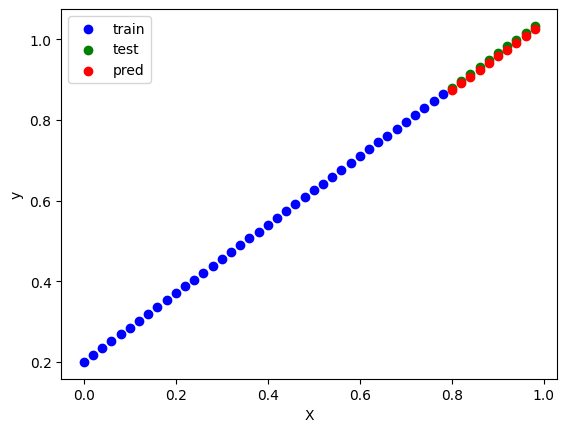

In [15]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

plot_preds(predictions=y_preds)

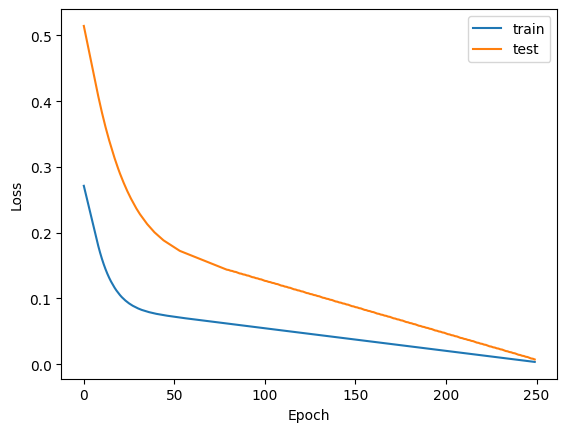

In [16]:
plt.plot(epoch_counts, np.array(torch.tensor(loss_values).numpy()), label='train')
plt.plot(epoch_counts, test_loss_values, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Save/load the model

In [17]:
from pathlib import Path

# create a directory
model_path = Path('models')
model_path.mkdir(parents=True, exist_ok=True)

# create a path
model_name = '01_pytorch_workflow_model_0.pt'
model_save_path = model_path / model_name

# save the model
torch.save(obj=model_0.state_dict(), f=model_save_path)

In [18]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Mar 31 15:18 01_pytorch_workflow_model_0.pt


In [19]:
# instantiate the model
loaded_model_0 = LinearRegressionModel()

# load the model
loaded_model_0.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [20]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.8342])), ('bias', tensor([0.2068]))])

### Putting everything together

In [21]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.2.1+cu121'

In [22]:
## device agnostic
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [23]:
## data
weight = -0.8
bias = 0.3

X = torch.arange(start=0, end=1, step=0.01).unsqueeze(dim=1)
y = weight * X + bias


In [24]:
## split the data
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

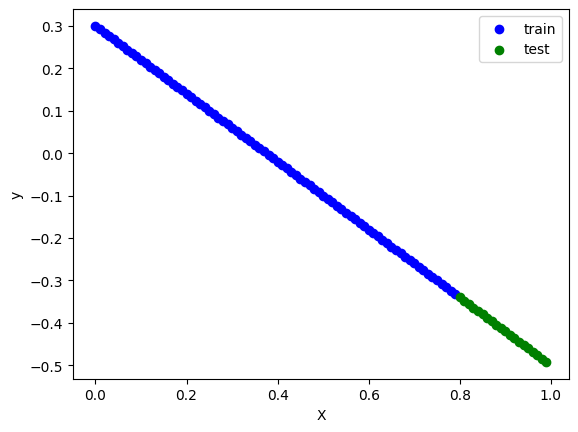

In [25]:
## plot the data
plot_preds(X_train, y_train, X_test, y_test)

In [26]:
# send data to device

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [27]:
## building a model
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x):
    return self.linear_layer(x)

In [28]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [29]:
# send the model to device
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [30]:
## Training

# loss
loss_fn = nn.MSELoss()   # Mean Square Error

# optimizer
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.01)

# training loop
torch.manual_seed(42)

epochs = 1000
for epoch in range(epochs):
  model_1.train()

  # forward pass
  y_pred = model_1(X_train)

  # loss
  loss = loss_fn(y_pred, y_train)

  # optimizer
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # optimizer step
  optimizer.step()


  ## Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 == 0:
    print(f'Epoch: {epoch}, Loss: {loss:.4f}, Test loss: {test_loss:.4f}')

model_1.state_dict()

Epoch: 0, Loss: 1.4484, Test loss: 3.6612
Epoch: 100, Loss: 0.0555, Test loss: 0.2972
Epoch: 200, Loss: 0.0200, Test loss: 0.0823
Epoch: 300, Loss: 0.0131, Test loss: 0.0526
Epoch: 400, Loss: 0.0078, Test loss: 0.0314
Epoch: 500, Loss: 0.0043, Test loss: 0.0171
Epoch: 600, Loss: 0.0021, Test loss: 0.0086
Epoch: 700, Loss: 0.0010, Test loss: 0.0040
Epoch: 800, Loss: 0.0004, Test loss: 0.0017
Epoch: 900, Loss: 0.0002, Test loss: 0.0007


OrderedDict([('linear_layer.weight', tensor([[-0.7672]])),
             ('linear_layer.bias', tensor([0.2859]))])

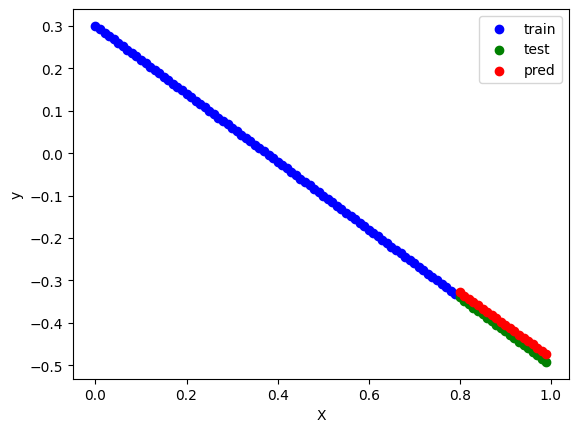

In [31]:
## Evaluate the model
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)

plot_preds(X_train, y_train, X_test, y_test, predictions=y_preds.cpu())

In [35]:
## Saving/loading the trained model

from pathlib import Path

# directory
model_path = Path('models')
model_path.mkdir(parents=True, exist_ok=True)

# path
model_name = '01_pytorch_workflow_model_1.pt'
model_save_path = model_path / model_name

# save
torch.save(obj=model_1.state_dict(), f=model_save_path)

In [37]:
# load
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(model_save_path))
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [38]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.7672]])),
             ('linear_layer.bias', tensor([0.2859]))])

In [40]:
# evaluate loaded model

loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])